In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'CADUSD=X'
numbers_in_currency = 'USD'
share_name = 'PAAS.TO'

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [4]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2012-12-31,247,-162,85,-21,-6,-99,19,-9,-22,...,-76,-141,-1,-8,-10,-2,-20,-1,-80,152
1,2013-03-31,243,-168,75,-6,-6,-18,-5,40,-20,...,-48,-88,0,-19,-5,-21,-46,0,-102,152
2,2013-06-30,176,-172,4,-5,-6,-181,5,-182,-5,...,45,0,0,-19,-1,14,-6,-1,-7,152
3,2013-09-30,214,-180,34,-4,-3,1,-3,26,-12,...,-9,-51,0,-19,0,-2,-21,1,-30,152
4,2013-12-31,192,-173,19,-1,-3,-320,-7,-312,-19,...,47,13,-1,-19,0,2,-17,0,42,152


## Calculate date when quaterly reports could be available

In [5]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [6]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
40,2022-12-31,2023-02-11,210,375,-340,35,-172,107,137,472,...,0,3248,89,0,27,381,180,1053,-112,-72
41,2023-03-31,2023-04-21,365,390,-313,77,16,411,173,676,...,0,9113,203,0,72,508,1058,4115,51,-39
42,2023-06-30,2023-07-21,365,640,-569,71,-47,368,156,682,...,0,8962,203,0,64,532,1014,4052,117,-113
43,2023-09-30,2023-10-21,365,616,-554,62,-23,348,150,701,...,0,7534,191,0,54,516,705,2686,115,-109
44,2023-12-31,2024-02-11,365,670,-605,65,-68,400,138,712,...,0,7213,0,0,32,624,697,2441,167,-169


## Pull historical average USD national currency rates and add to the dataframe

In [7]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
40,2022-12-31,2023-02-11,210,375,-340,35,-172,107,137,472,...,3248,89,0,27,381,180,1053,-112,-72,0.736786
41,2023-03-31,2023-04-21,365,390,-313,77,16,411,173,676,...,9113,203,0,72,508,1058,4115,51,-39,0.739699
42,2023-06-30,2023-07-21,365,640,-569,71,-47,368,156,682,...,8962,203,0,64,532,1014,4052,117,-113,0.744481
43,2023-09-30,2023-10-21,365,616,-554,62,-23,348,150,701,...,7534,191,0,54,516,705,2686,115,-109,0.745795
44,2023-12-31,2024-02-11,365,670,-605,65,-68,400,138,712,...,7213,0,0,32,624,697,2441,167,-169,0.734535


## Convert USD values related to IS, BS, CFS to national currency

In [8]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
40,2022-12-31,2023-02-11,210,276.294837,-250.507319,25.787518,-126.727232,78.836127,100.939714,347.763101,...,2393.081680,65.573975,0.0,19.893228,280.715554,132.621522,775.835902,-82.520058,-53.048609,0.736786
41,2023-03-31,2023-04-21,365,288.482530,-231.525723,56.956807,11.835181,304.016205,127.967891,500.036385,...,6740.875116,150.158855,0.0,53.258313,375.766988,782.601325,3043.860540,37.724639,-28.848253,0.739699
42,2023-06-30,2023-07-21,365,476.467563,-423.609443,52.858120,-34.990587,273.968849,116.138968,507.735747,...,6672.034842,151.129555,0.0,47.646756,396.063662,754.903295,3016.635258,87.104226,-84.126304,0.744481
43,2023-09-30,2023-10-21,365,459.409940,-413.170628,46.239312,-17.153293,259.536784,111.869304,522.802545,...,5618.822221,142.446913,0.0,40.272949,384.830404,525.785727,2003.206330,85.766466,-81.291694,0.745795
44,2023-12-31,2024-02-11,365,492.138752,-444.393948,47.744804,-49.948411,293.814180,101.365892,522.989241,...,5298.204209,0.000000,0.0,23.505134,458.350121,511.971209,1793.001036,122.667420,-124.136491,0.734535


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [9]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [10]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [11]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [12]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2013-02-11,13.851319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
1,2013-02-18,13.851319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
2,2013-02-25,13.687490,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
3,2013-03-04,13.714396,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215
4,2013-03-11,14.060969,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,0.798527,0.201473,47.047619,11.571429,2.855491,2.426966,0.34413,-0.129555,-0.037703,-0.047215


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [13]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2013-02-11,13.851319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-16.299398,0.769577,2.111663,2.453768,3.548168
1,2013-02-18,13.851319,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-16.299398,0.769577,2.111663,2.453768,3.548168
2,2013-02-25,13.687490,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-16.106614,0.760475,2.086687,2.428792,3.506202
3,2013-03-04,13.714396,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-16.138274,0.761969,2.090789,2.432894,3.513094
4,2013-03-11,14.060969,2012-12-31,249.258596,-0.849806,17.998616,152.0,593.376738,3.903794,349.163863,...,2.426966,0.34413,-0.129555,-0.037703,-0.047215,-16.546102,0.781225,2.143625,2.485730,3.601872


# Calculate Dividend yield and currency-share price correlation

In [14]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

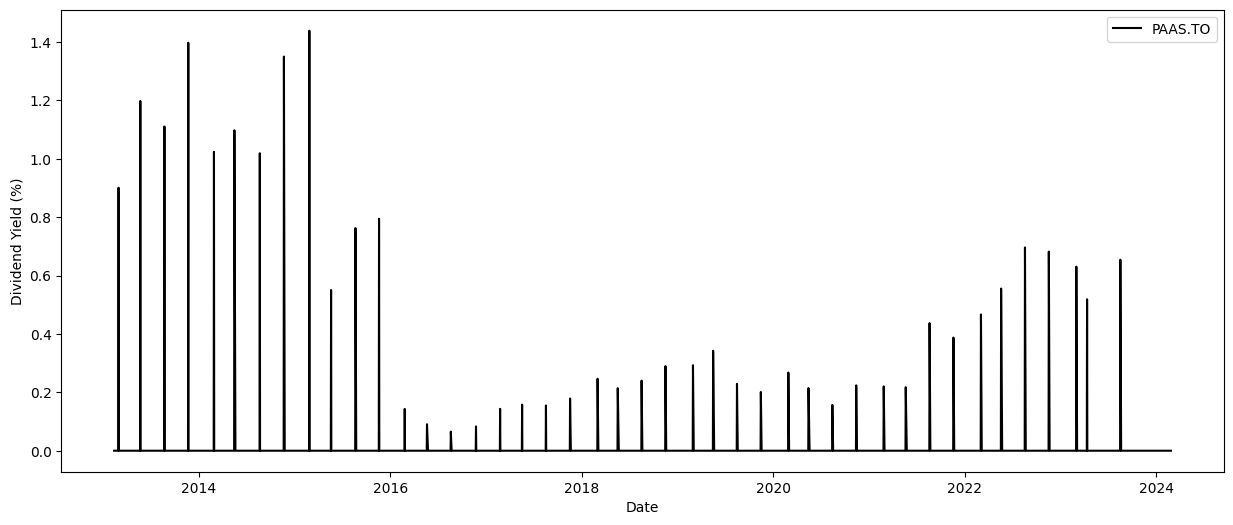

In [15]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   -0.37846
share_price      1.00000
Name: share_price, dtype: float64


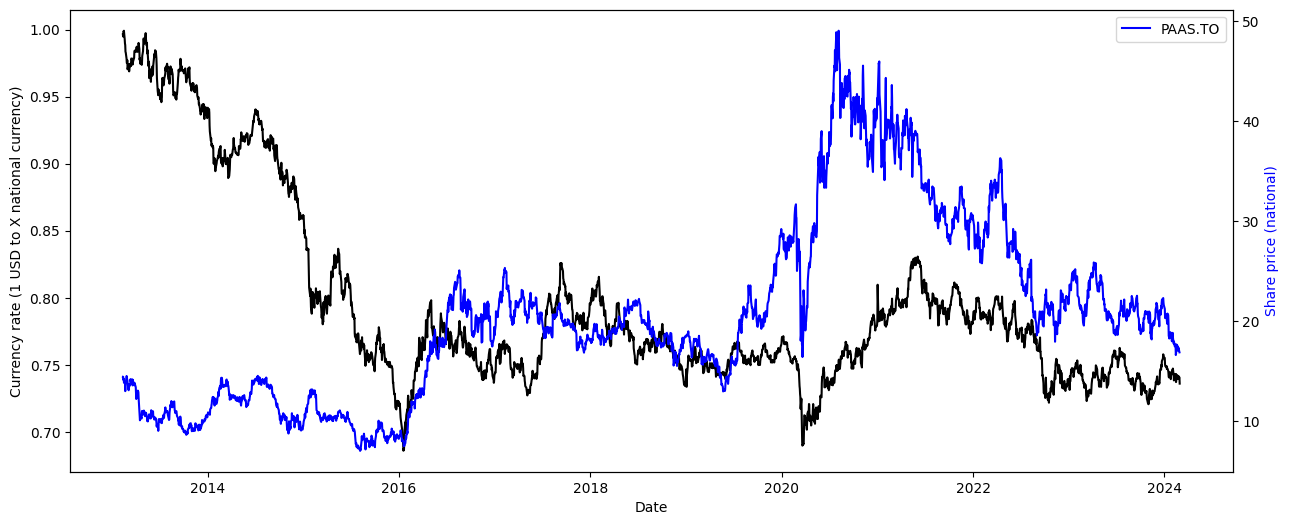

In [16]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

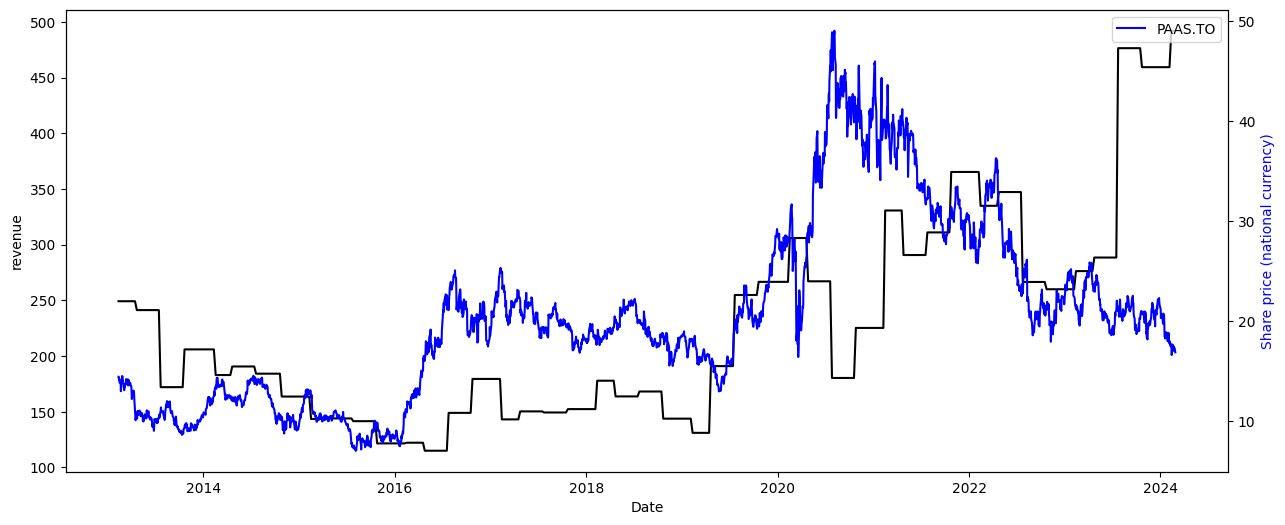

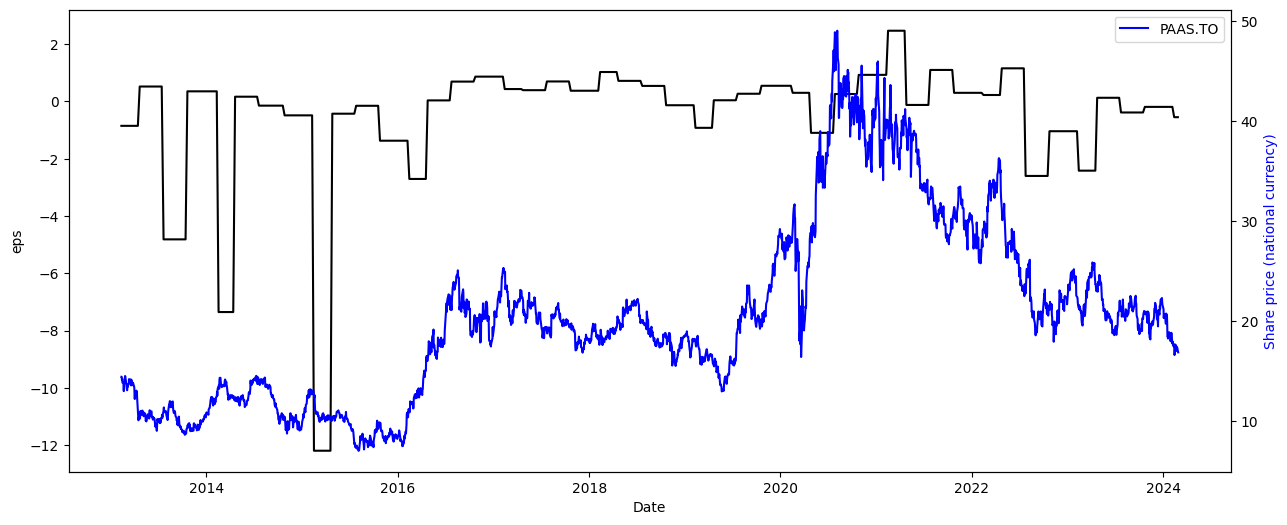

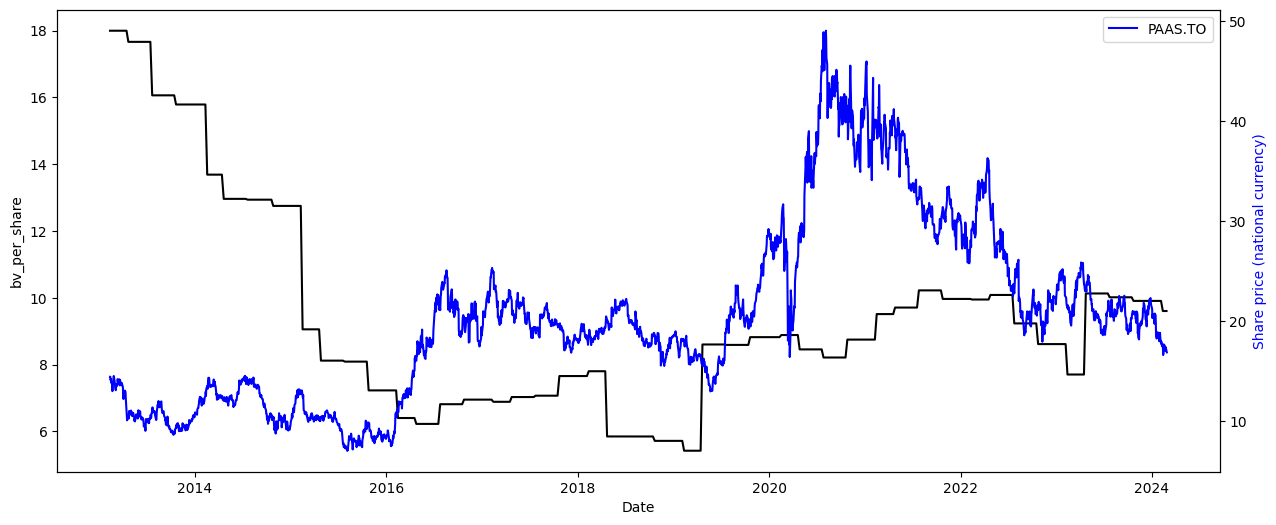

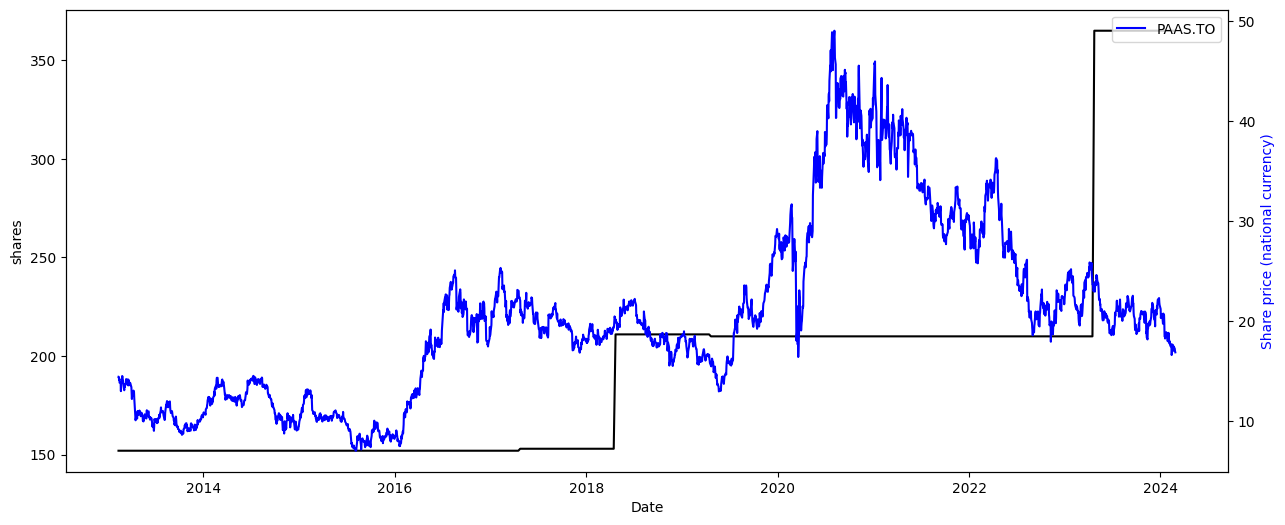

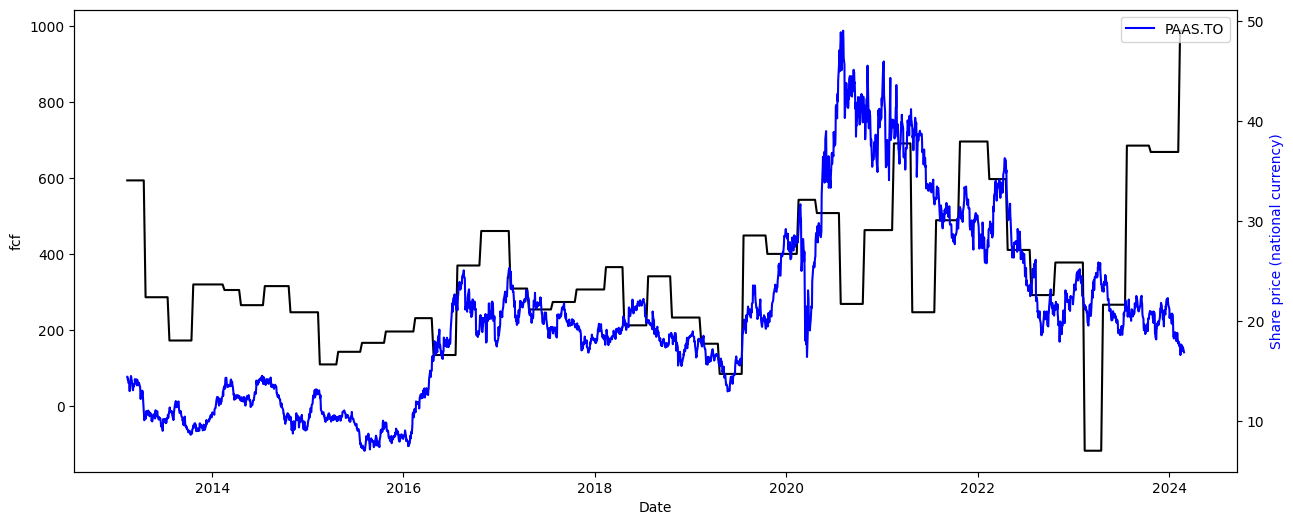

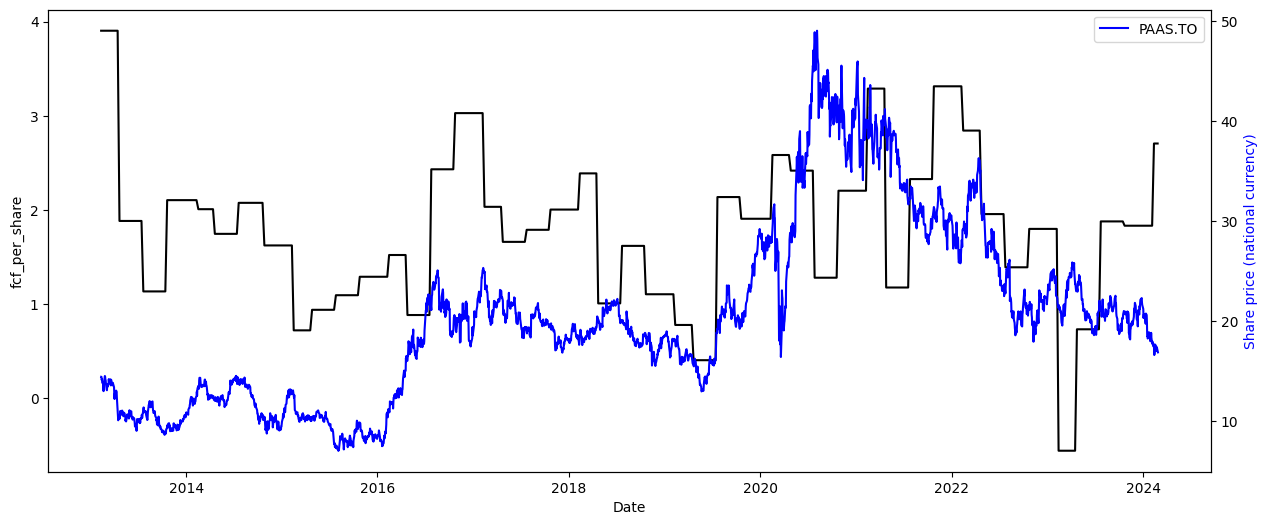

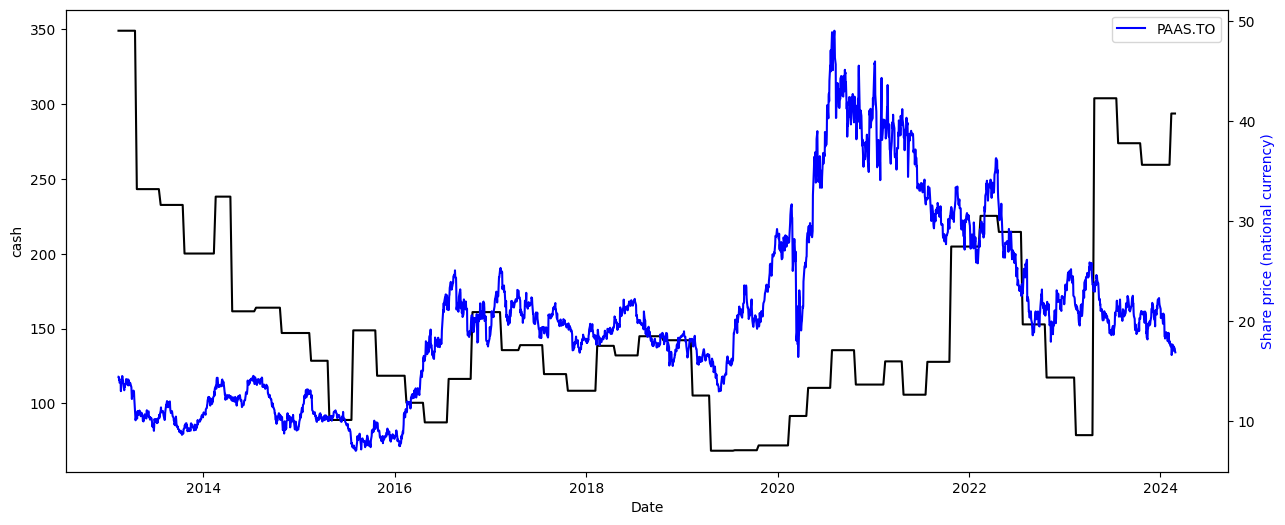

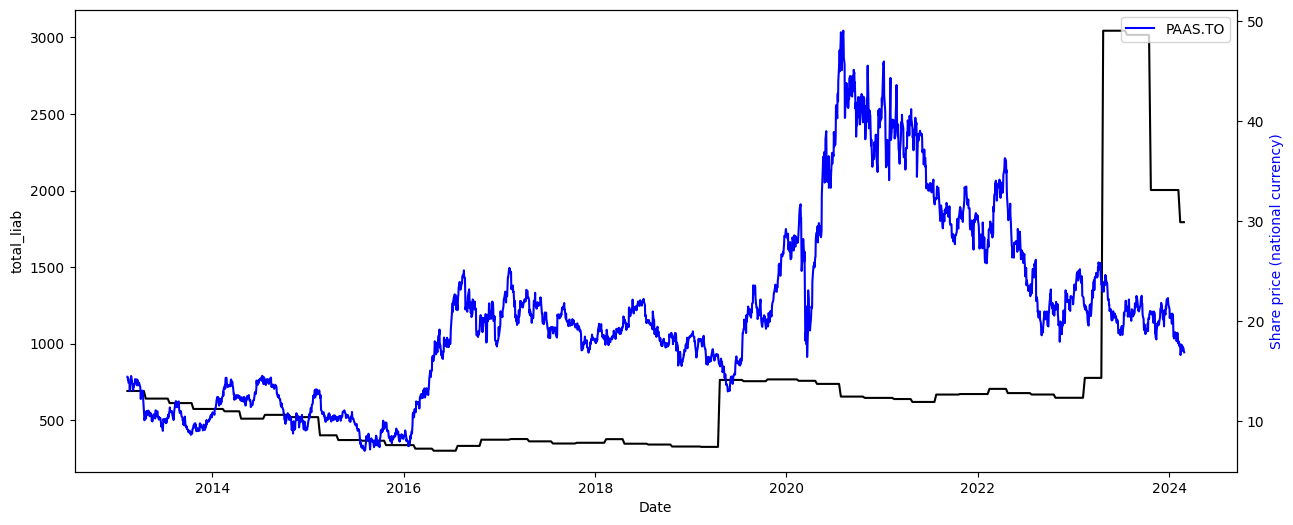

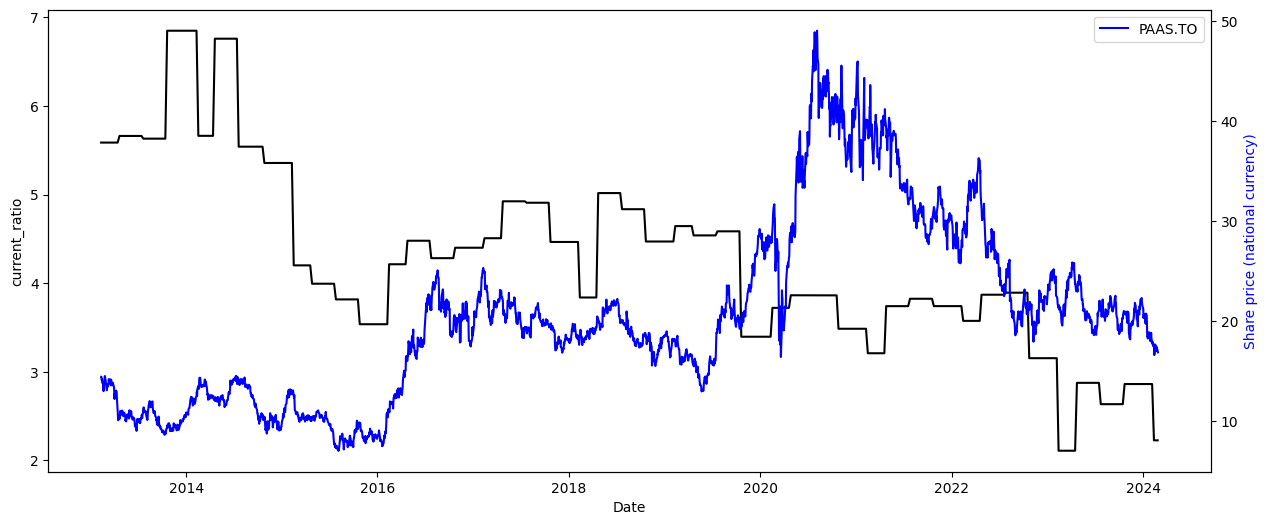

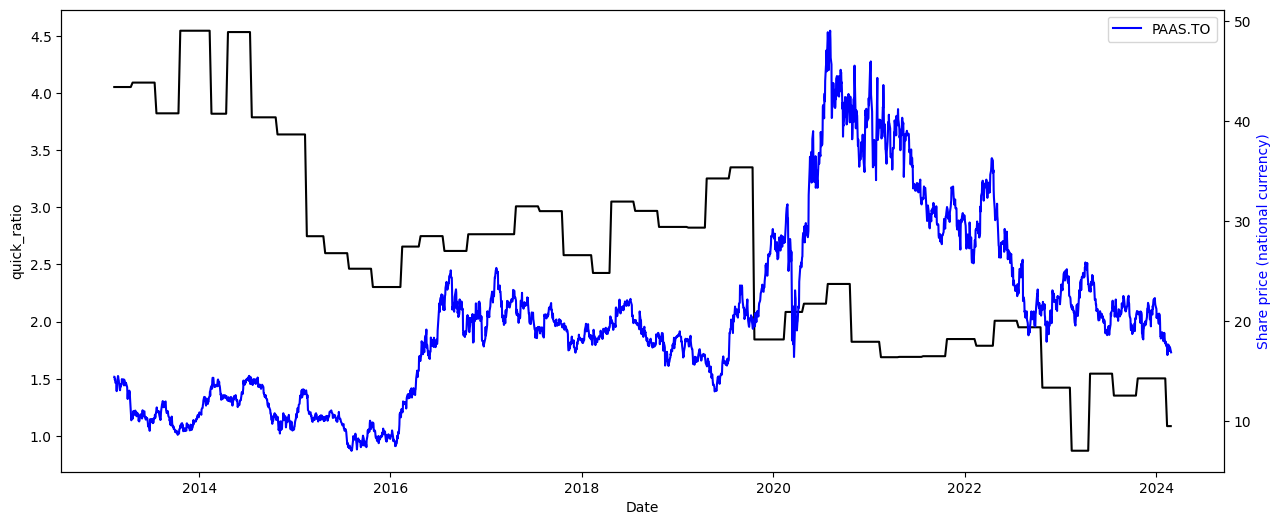

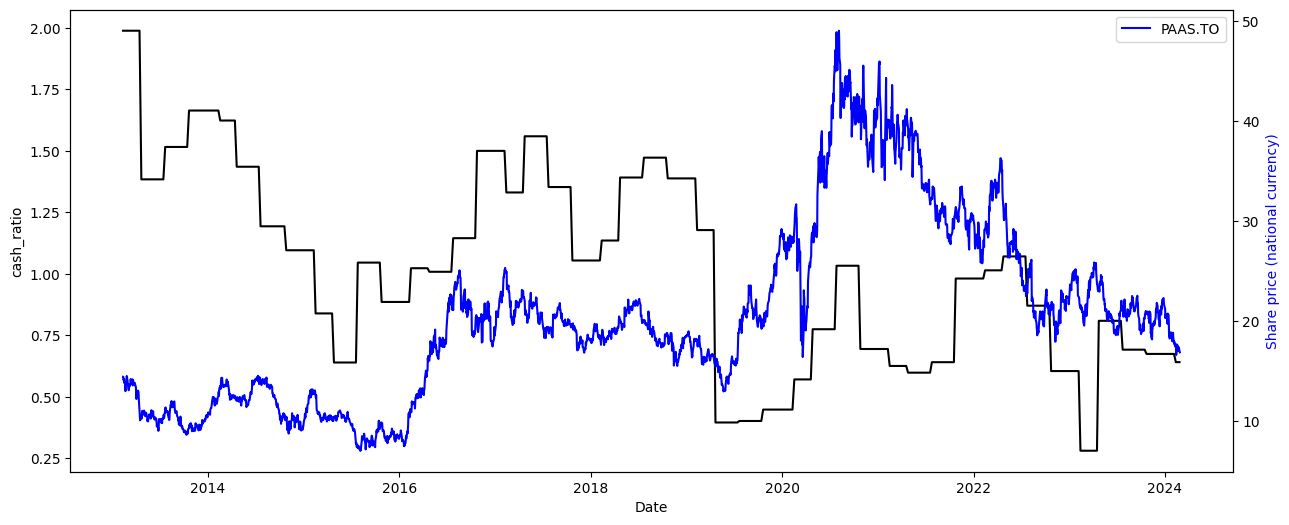

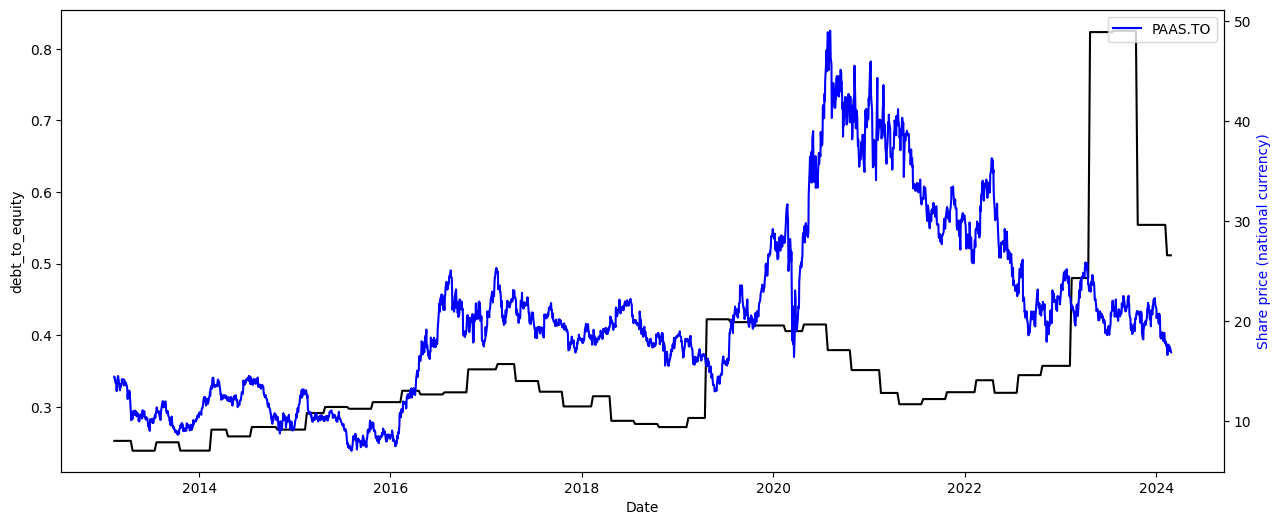

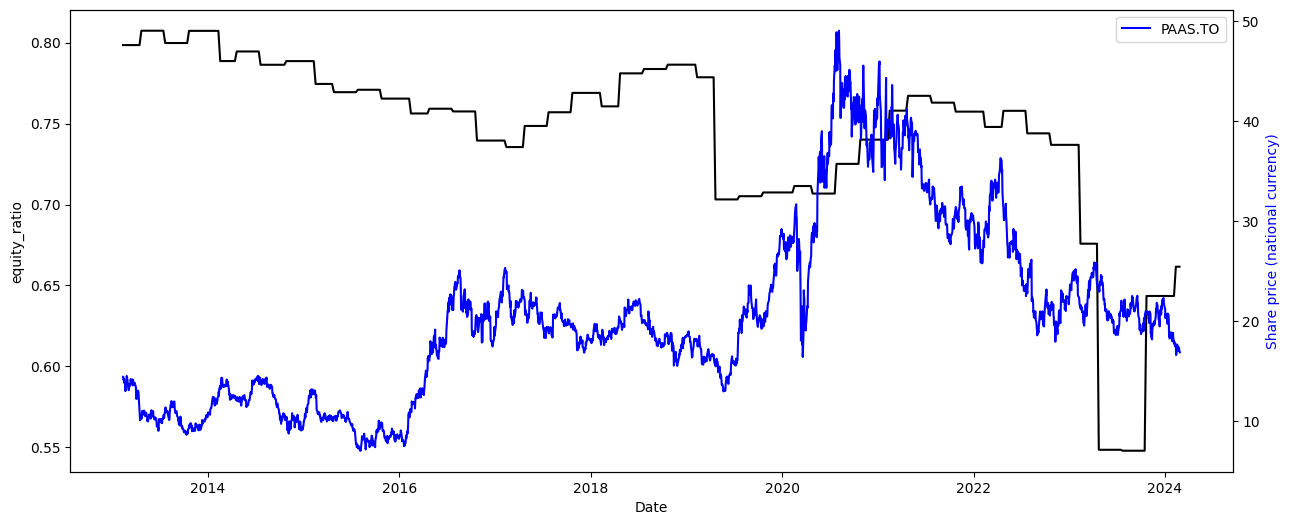

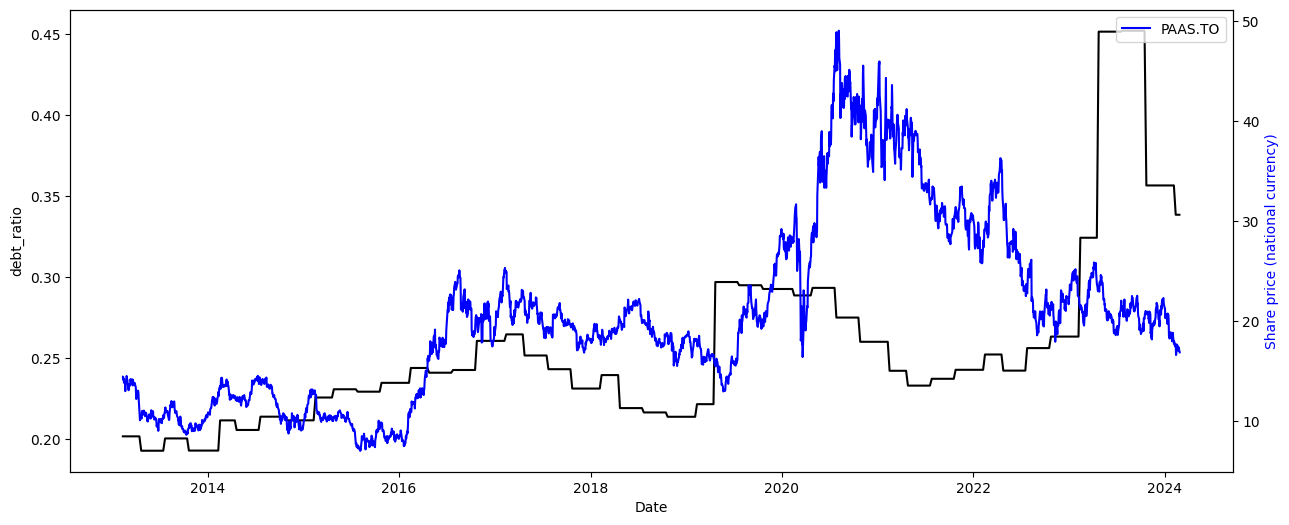

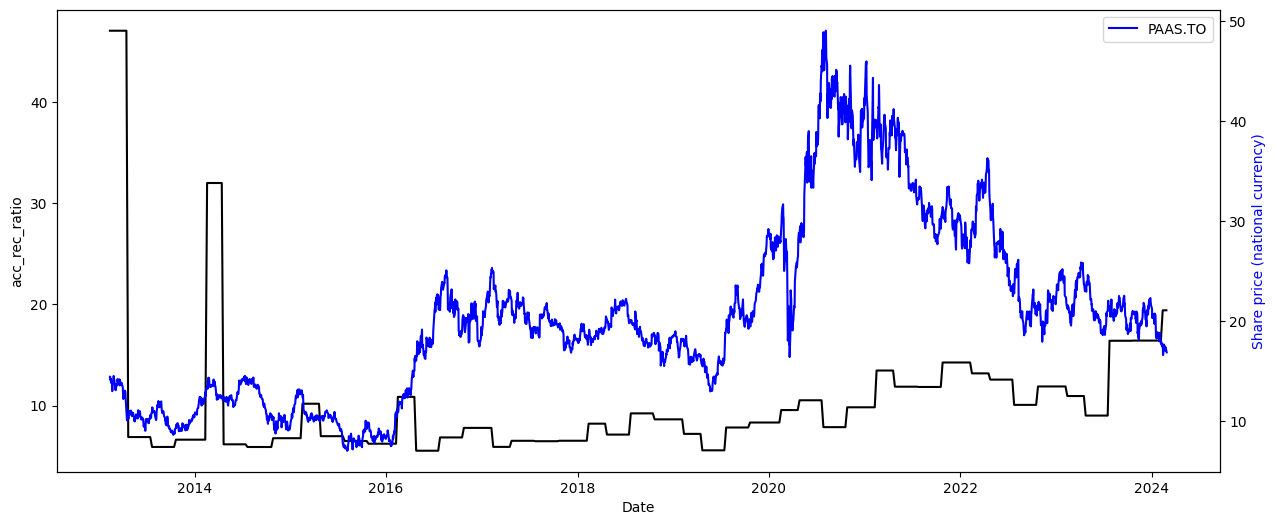

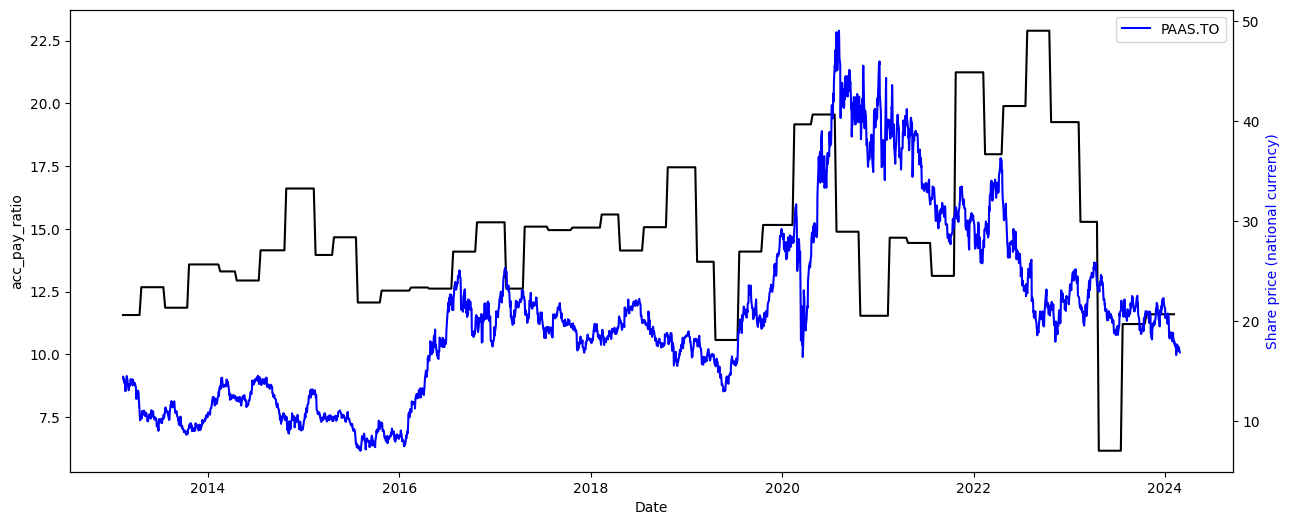

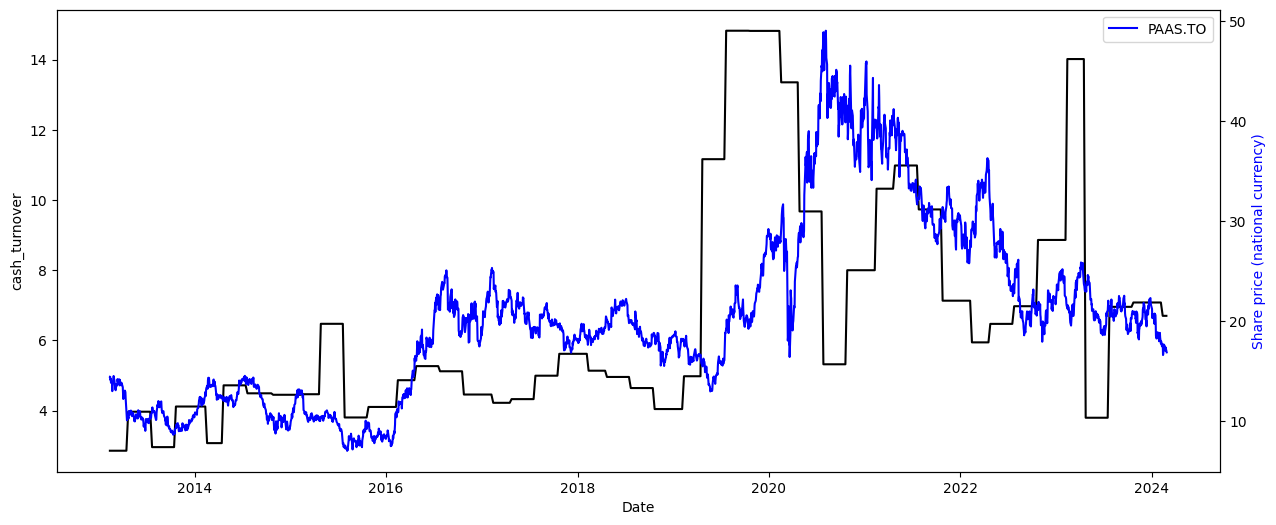

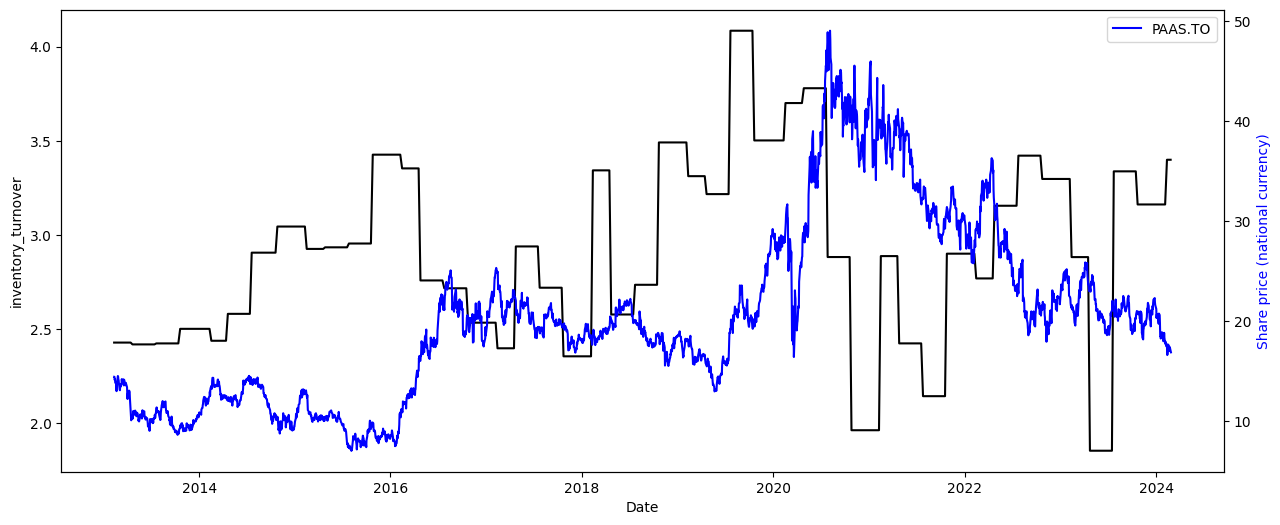

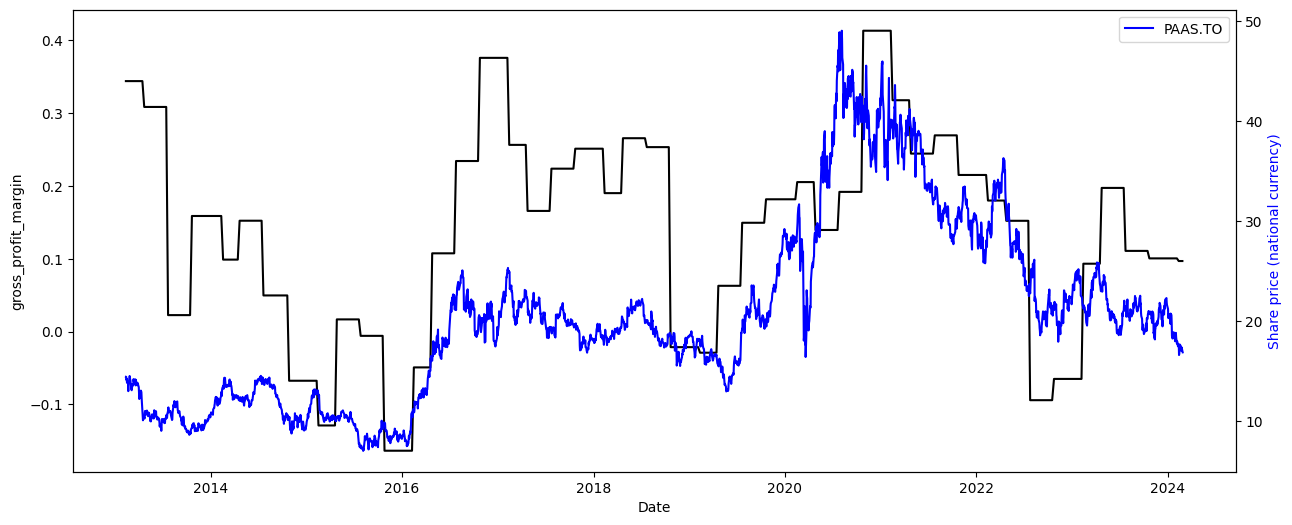

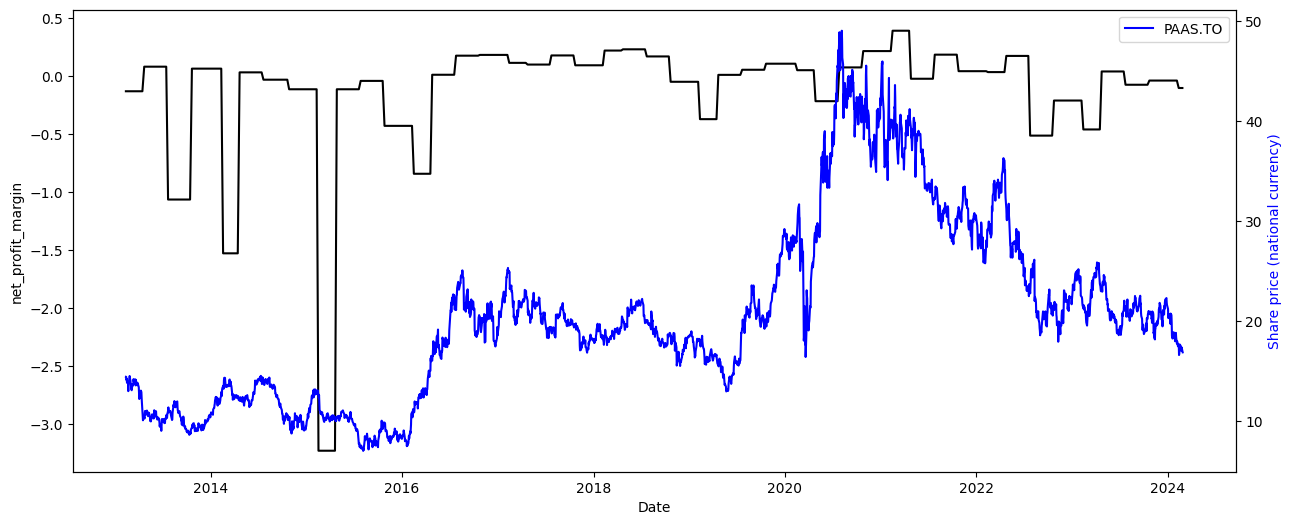

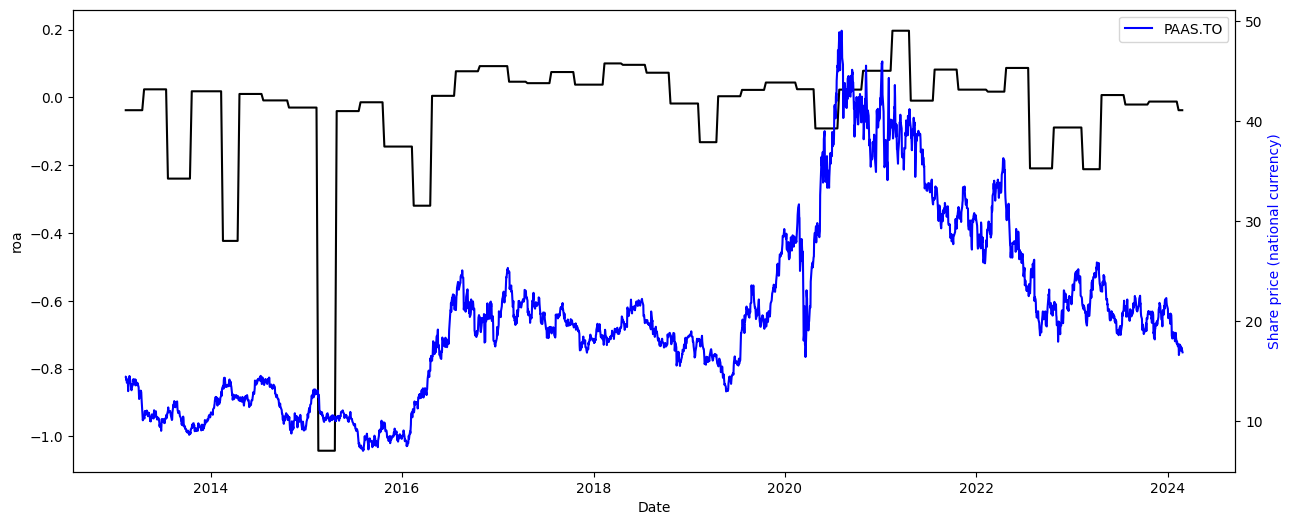

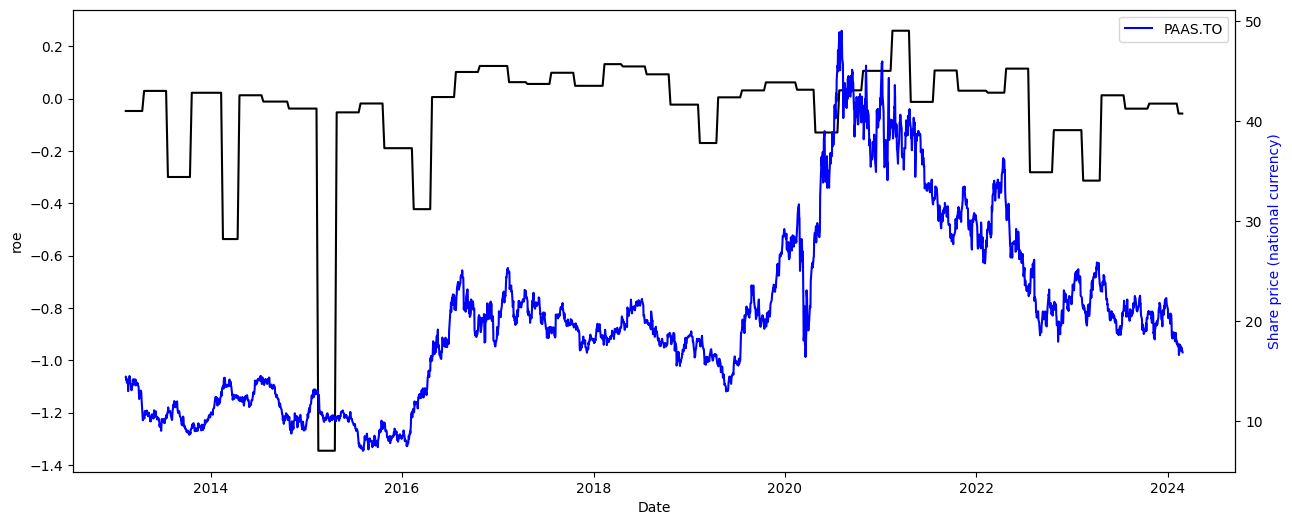

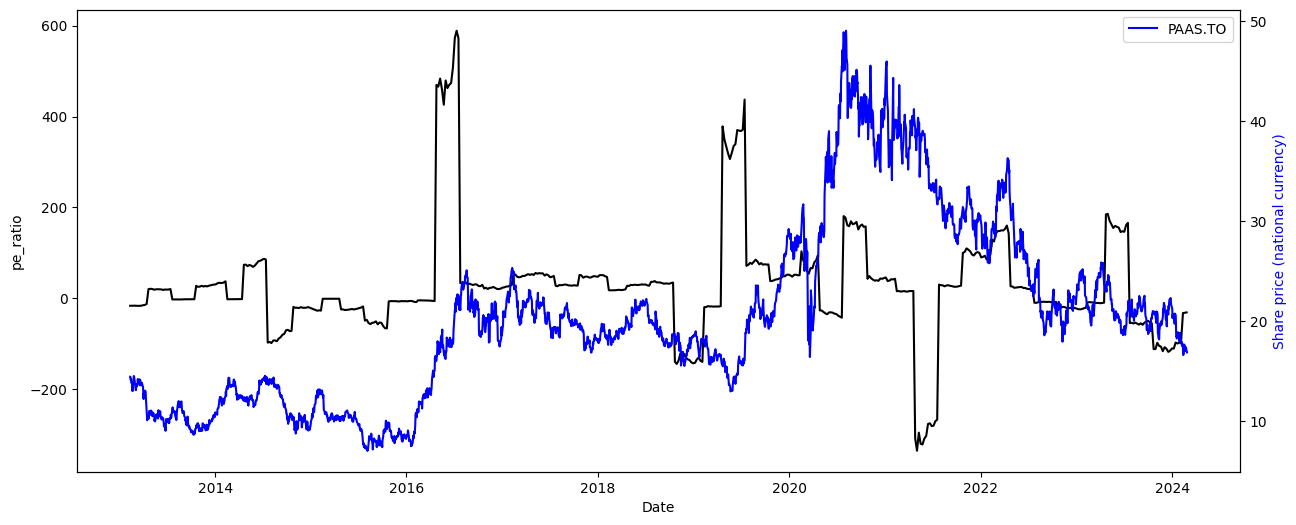

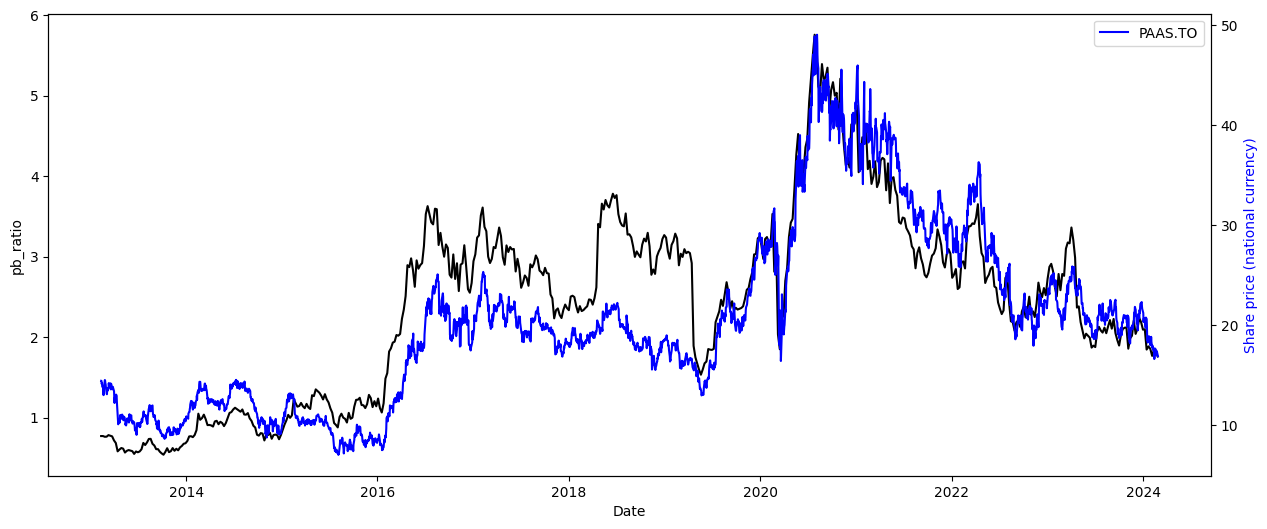

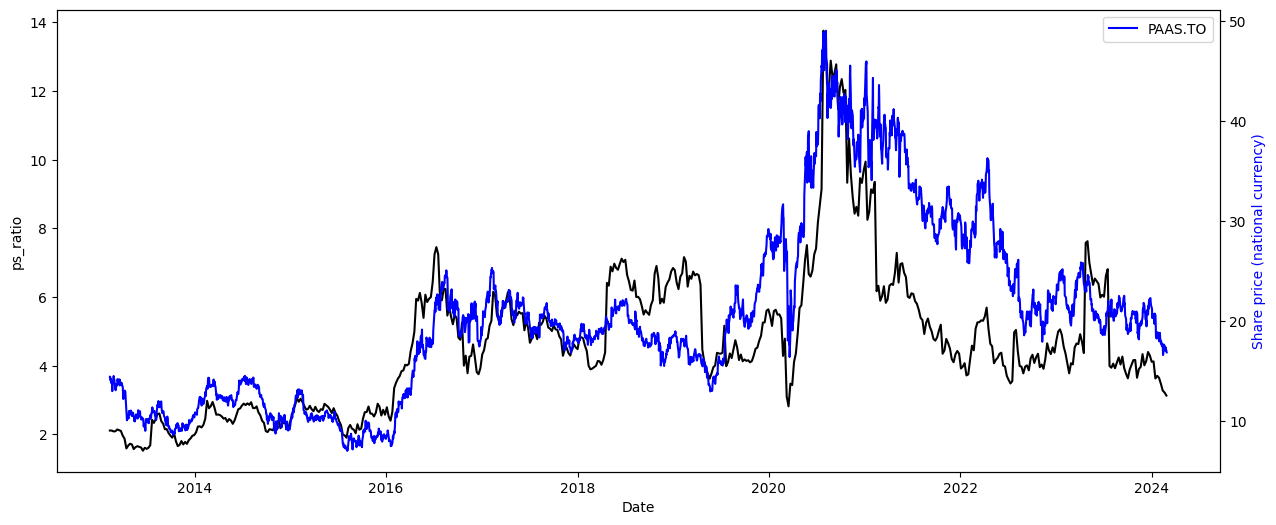

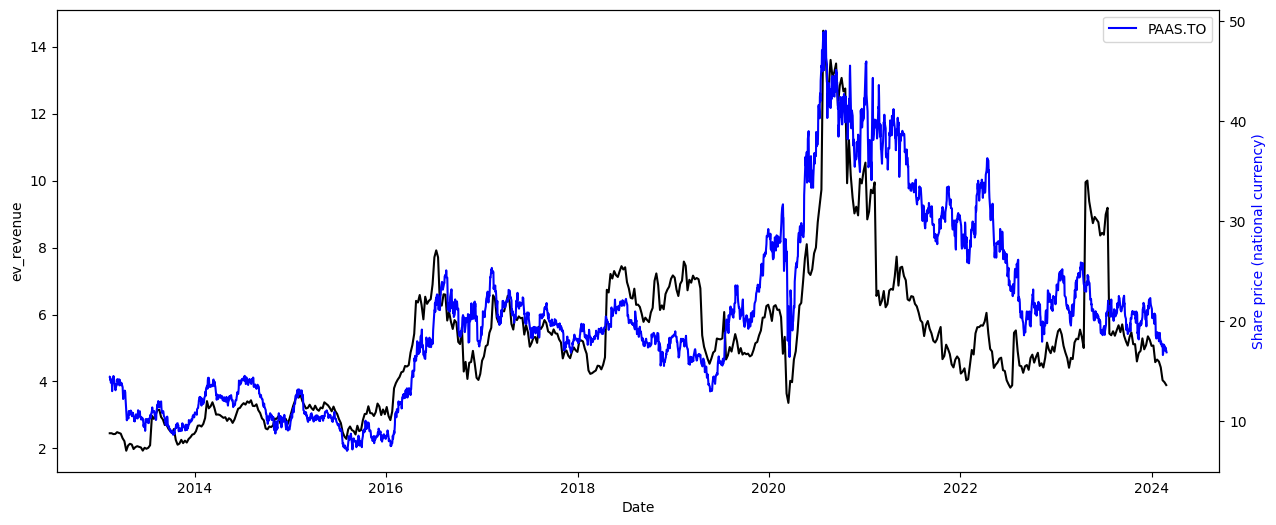

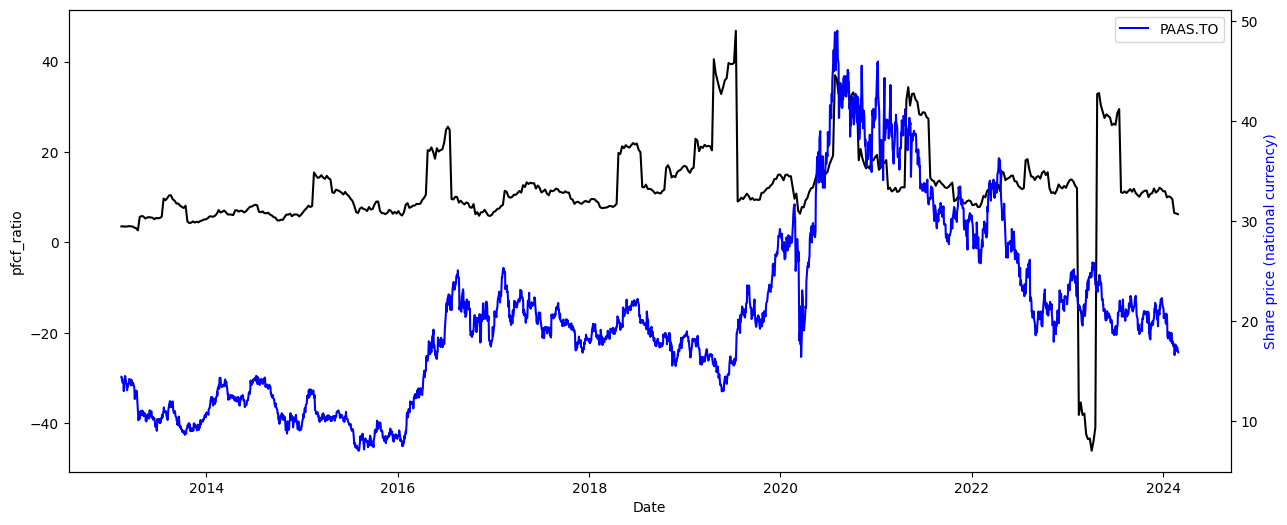

In [17]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

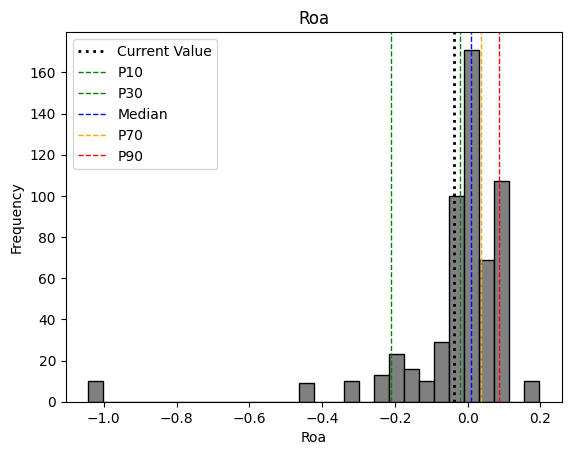

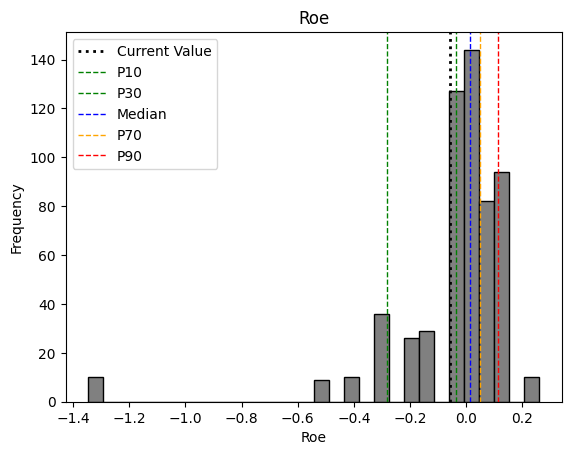

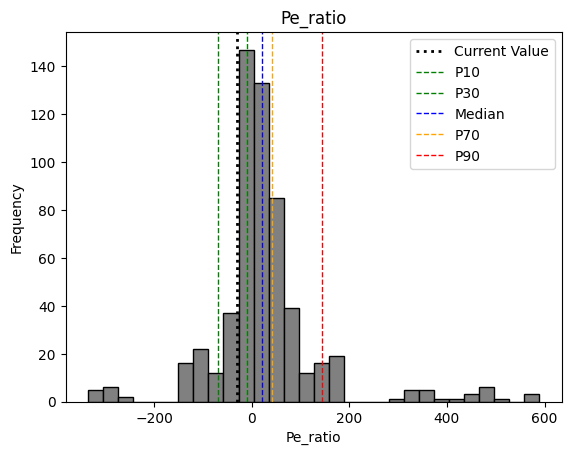

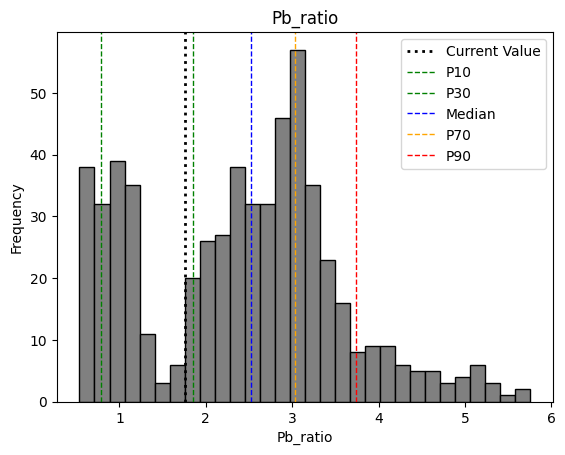

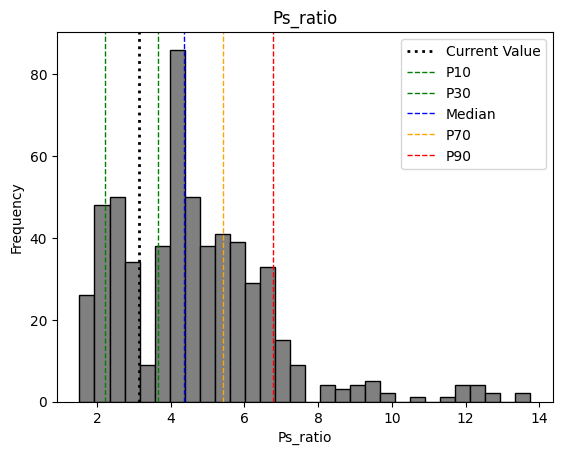

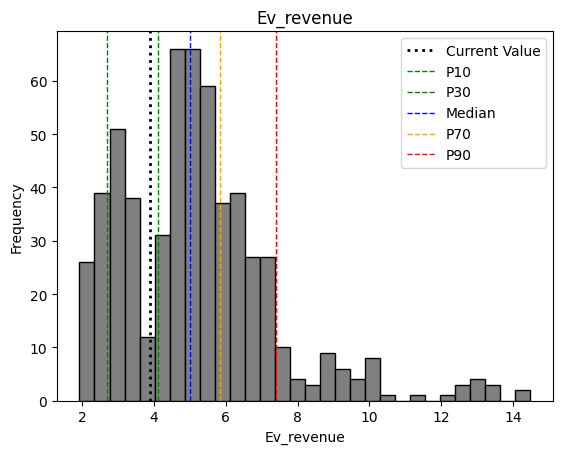

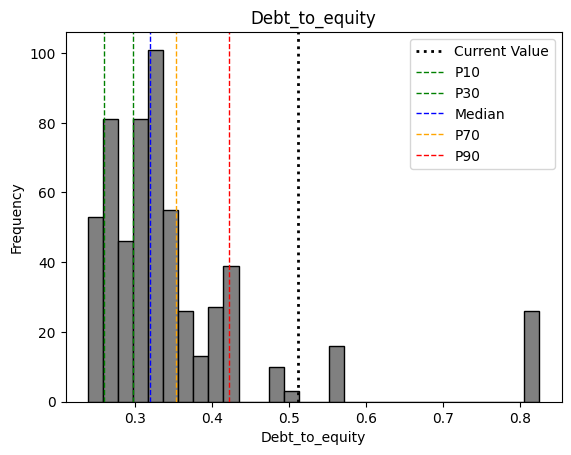

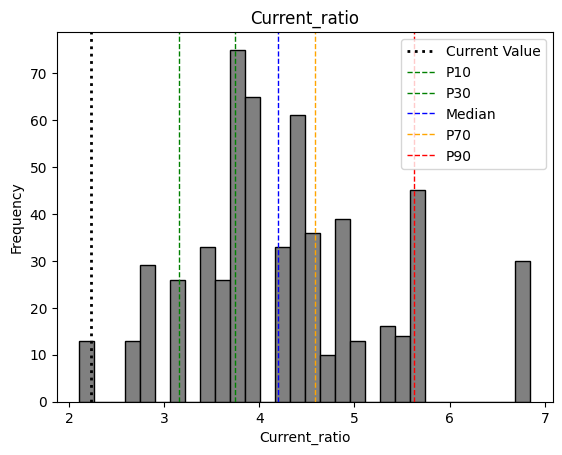

In [18]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[])

## Calculate correlation between value parameters

In [19]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.999541,0.130708,0.335247,0.262777,0.251508,0.063996,-0.008256
roe,0.999541,1.000000,0.134499,0.331628,0.262546,0.250837,0.055282,0.002958
pe_ratio,0.130708,0.134499,1.000000,0.112505,0.193041,0.211923,0.089987,0.074650
pb_ratio,0.335247,0.331628,0.112505,1.000000,0.913888,0.871917,0.144120,-0.462736
ps_ratio,0.262777,0.262546,0.193041,0.913888,1.000000,0.987423,0.203323,-0.359844
ev_revenue,0.251508,0.250837,0.211923,0.871917,0.987423,1.000000,0.337666,-0.408446
debt_to_equity,0.063996,0.055282,0.089987,0.144120,0.203323,0.337666,1.000000,-0.627670
current_ratio,-0.008256,0.002958,0.074650,-0.462736,-0.359844,-0.408446,-0.627670,1.000000


0 timestemos have been found!


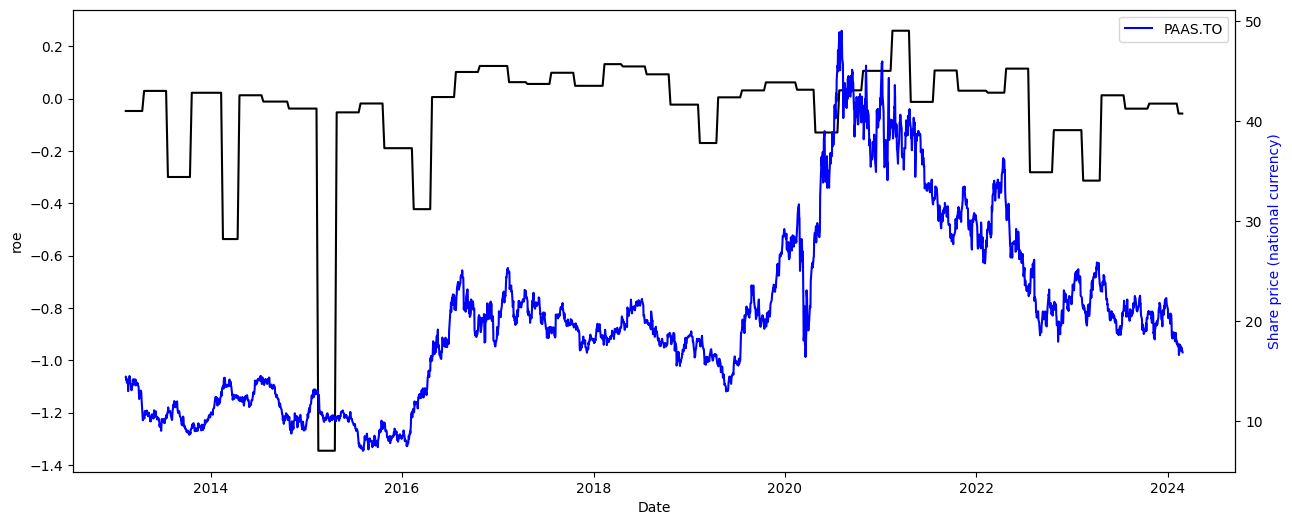

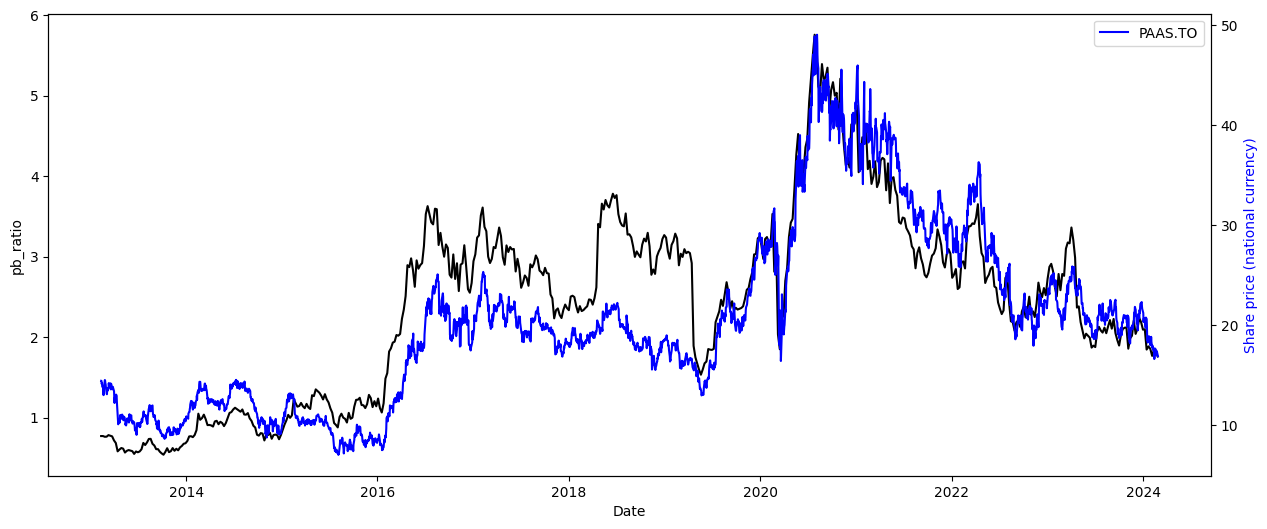

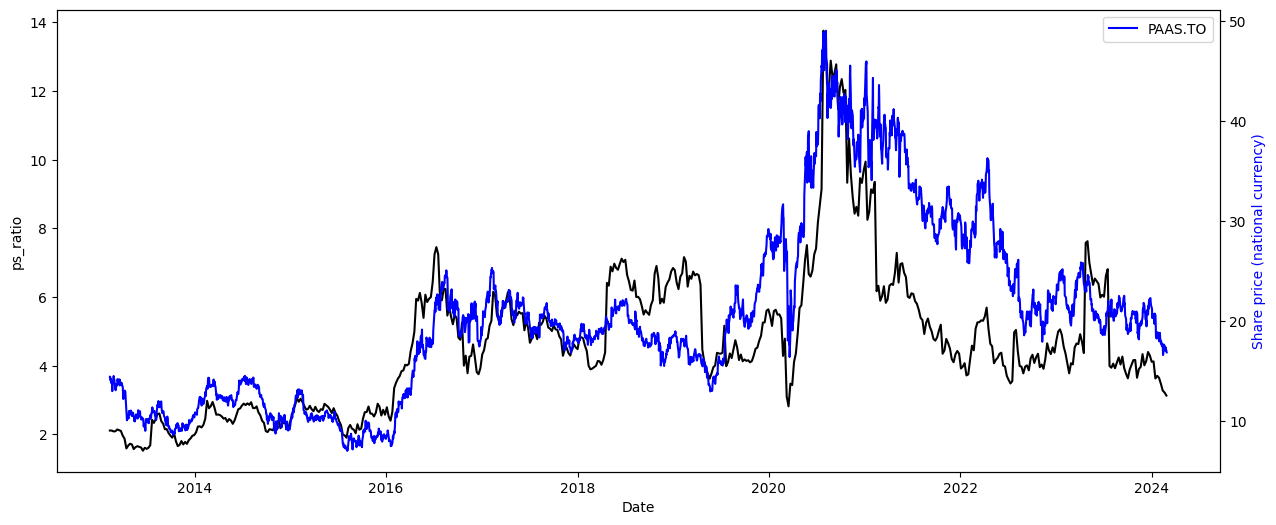

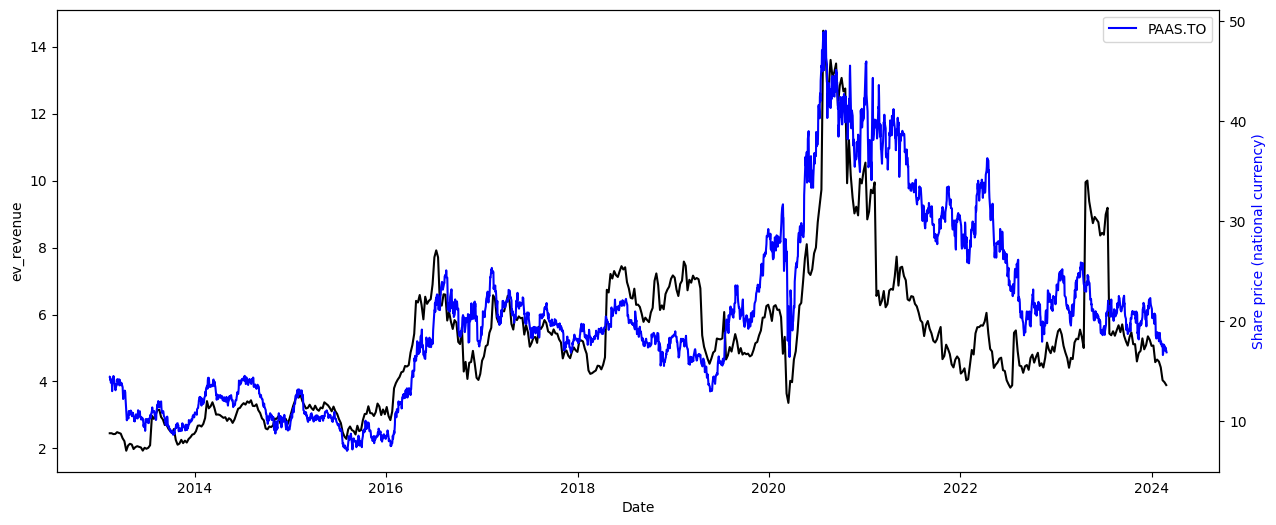

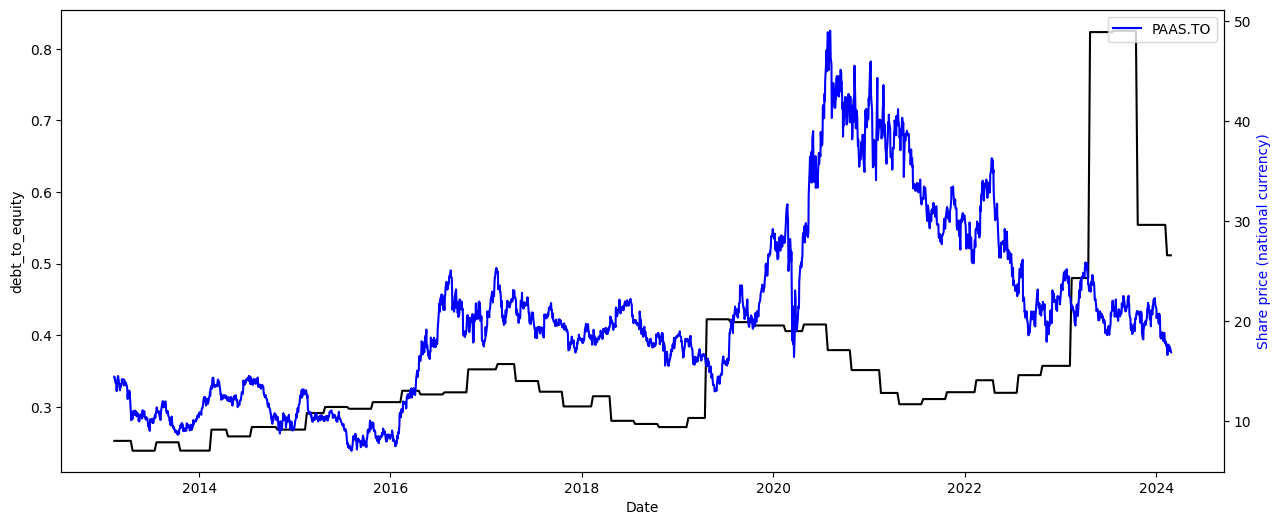

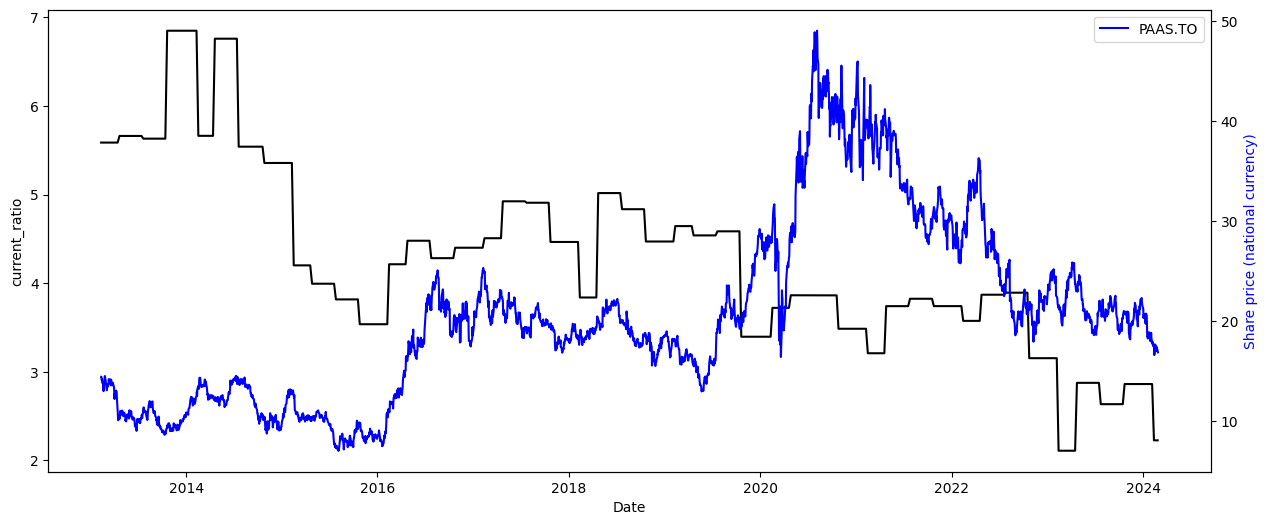

In [20]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2
    )